## Evaluation of SMRT with PAMIR data

This practical builds on the earlier microstructure practical. The same thin section image will be used to derive SMRT snowpack parameters and used to evaluate SMRT against measured brightness temperature. There are multiple frequencies and temporal observations, so there are numerous ways of approaching this. Do what you think is interesting / most appropriate and we will discuss the different methods used at the end.

#### Objectives

1. Read in an external .csv observation file
2. Consider approximations to be used
3. Compare outputs with real data

In [1]:
# Standard imports
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# local import
from smrt import make_snowpack, make_model, sensor_list
from smrt.substrate.reflector import make_reflector
from smrt.core.globalconstants import FREEZING_POINT

### PAMIR field data

The PAMIR experiment captured a freeze-melt-freeze cycle of a snowpack over 2 days in Weissflujoch, Switzerland, May 1984. This snowpack has a simple substrate given by snow with a non-zero liquid water content. Gradually the ripe snowpack refreezes and cools from mid-afternoon and overnight, so the thickness of the frozen snowpack grows. 

#### First we'll look at the observed data using the pandas dataframe module

Pandas is a useful python module that helps easy referencing and manipulation of data. A dataframe is a way of storing data - a bit like a spreadsheet. The read_csv module allows csv files to be read in to a dataframe. 

In [2]:
# Read PAMIR
obs = pd.read_csv('data/PAMIR_obs_09May84.csv')

Let's have a look at what is inside the dataframe

In [3]:
# Look at first 3 data rows
obs.head(3)

,Unnamed: 0,Time(h),d(m),Ts(C),Ws,T4.9V,T10.4V,T21V,T35V,T94V,T4.9H,T10H,T21H,T35H,T94H,Ts4.9,Ts10,Ts21,Ts35,Ts94
0,1,14.90,0.000,0.0,0.01,263.0,267.0,268.0,267.5,259.8,233.0,247.0,254.0,267.0,255.5,6,6,22.0,19.5,50.0
1,2,15.08,0.001,-0.5,0.00,263.5,266.1,268.1,268.3,258.1,NaN,NaN,NaN,NaN,NaN,6,6,22.0,19.5,50.0
2,3,15.33,0.002,-1.0,0.00,262.3,266.7,268.2,268.0,257.2,233.8,251.1,262.1,267.5,250.8,6,6,18.5,14.5,43.5


These columns give the time of day (Time(h)), thickness of frozen layer (d(m)), temperature of surface (Ts(C)) in deg C, and brightness temperature observations at various frequencies e.g. 4.9GHz Vpol (T4.9V). Ts give the downwelling atmospheric contribution, which we will ignore for now. Have a look at more of the data. You can use obs.tail() to look at the end, or slice a few rows of the data e.g. obs[4:7]

You can also select data based on specific elements e.g. to print the whole row for time 15.08

In [4]:
obs[obs['Time(h)']==15.08]

,Unnamed: 0,Time(h),d(m),Ts(C),Ws,T4.9V,T10.4V,T21V,T35V,T94V,T4.9H,T10H,T21H,T35H,T94H,Ts4.9,Ts10,Ts21,Ts35,Ts94
1,2,15.08,0.001,-0.5,0.0,263.5,266.1,268.1,268.3,258.1,NaN,NaN,NaN,NaN,NaN,6,6,22.0,19.5,50.0


Or be even more specific by selecting one brightness temperature value for that particular time. Check other row / column outputs.

In [5]:
T4_9V = obs[obs['Time(h)']==15.08]['T4.9V']
print (T4_9V)

1    263.5
Name: T4.9V, dtype: float64


Here is a quick plot of TB35V against time. Have a look at other frequencies, frozen layer thickness or surface temperature.

<IPython.core.display.Javascript object>


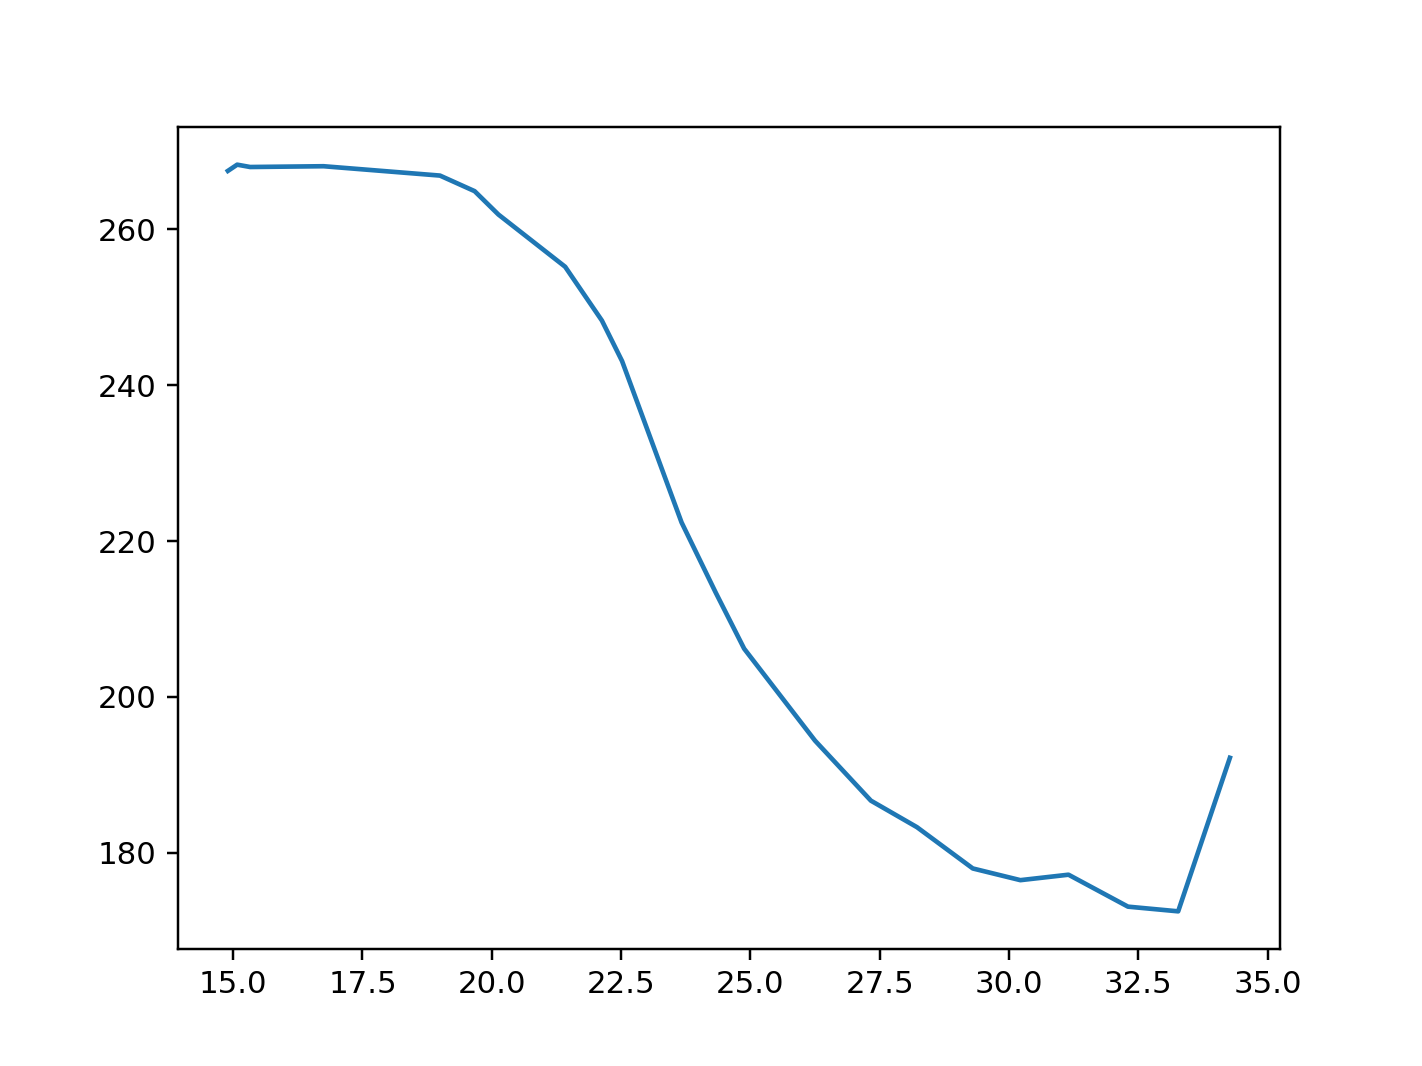

In [6]:
plt.plot(obs['Time(h)'], obs['T35V'])

First, set up the sensor. This can be a single frequency or range of frequencies. The PAMIR radiometers were mounted at an incidence angle of 50 degrees.

In [7]:
## BLANK THIS CELL
rad = sensor_list.passive(19e9,50)

The next step is to set up the snowpack or list of snowpacks. As the substrate is a melting snow layer, it will not be represented well by the default pure reflector. A better representation is given below (pure absorber), but the snowpack details will need to be filled in. This will require some interpretation of the microstructure image (which you already analysed in the microstructure practical, but may need to extend for deeper snow). Note that the IBA electromagnetic model can be used with any microstructure model, but DMRT requires sticky_hard_spheres and Rayleigh requires independent_sphere model. You'll also need some assumption about the snow temperature, but you do have data for the snow surface temperature.

In [10]:
# Make the absorber
absorber = make_reflector(specular_reflection=0., temperature=FREEZING_POINT)

# Now make the snowpack. The substrate has already been specified
## USE EMPTY BRACKETS
snowpack_exp = make_snowpack(thickness=[0.1],
                         microstructure_model="exponential",
                         temperature=[270.],
                         density=[300.],
                         corr_length=[0.3e-4],
                         substrate=absorber)

The model configuration needs to be specified using the function make_model. This has been given below, except for the electromagnetic model, which has to be inserted between the empty ' '.

In [11]:
## BLANK OUT iba
m = make_model('iba','dort')

### Time to run the model for your sensor on your snowpack e.g. m.run(sensor, snowpack)

In [13]:
## BLANK THIS CELL
res = m.run(rad, snowpack_exp)
print res.TbV()

273.083515457


How does it compare with the observation? Can you improve the simulation? Look at different frequency / polarization combinations or even other microstructure models!